<a href="https://colab.research.google.com/github/dyoni2/jiyeon/blob/main/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 확률적 경사 하강법

훈련 및 테스트 데이터 준비

-데이터준비

-훈련과 테스트 데이터로 분할

-정규화

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 확률적 경사 하강법을 이용한 분류



*   sklearn.linear_model패키지의 SGDClassifier클래스
*   미니배치 또는 배치 경사 하강법을 지원하지 않음

loss: 손실 함수 종류 지정 (log_loss로 지정)

log_loss: 로지스틱 손실 함수를 뜻함

max_iter: 수행할 에포크 횟수 지정(10으로 지정)



In [5]:
from sklearn.linear_model import SGDClassifier

In [10]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.coef_, sc.intercept_)

0.773109243697479
0.775
[[ -6.30108425  -0.59572877   7.88184358  28.50725844  -4.57524048]
 [-28.03749856 -13.01864174 -24.28354218  37.56556413  -4.99369156]
 [ -3.93249682  17.77205773 -49.51418932 -27.49911662  47.56263543]
 [  4.33466212  15.13001677  12.21938065 -24.53199057  -0.61293767]
 [-47.59621032 -19.71411219  21.76713851   1.91422973  21.0069932 ]
 [  7.03785146   6.44153908   8.0385569  -19.38693385 -24.29711606]
 [-19.43087985  -7.13217691  -2.58092476   0.7050211   11.6470326 ]] [-21.30540045 -43.12497336 -14.70492136 -30.38561783 -17.12077509
 -62.17137674 -25.16714949]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


점진적 학습이 가능하므로, 추가 훈련 수행

1 에포크씩 이어서 훈련함

In [11]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


정확도를 높이기 위해 여러 에포크에서 더 훈련을 ...

**조기종료**

과대적합이 시작되기 전에 훈련을 중단함

In [12]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [13]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

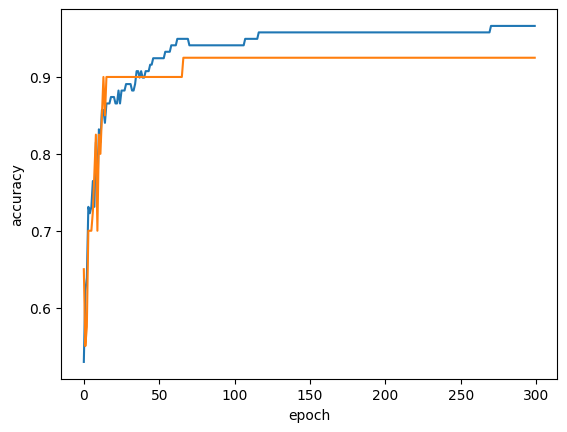

In [14]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크 100이 적당해보임

max_iter=100으로 설정하고 다시 SGDClassifier 모델 훈련



*   tol 매개변수
- 향상될 최솟값 지정




In [15]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


**힌지 손실**

SGDClassifier 에서 기본적으로 사용하는 손실함수

In [16]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# 실습

In [25]:
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
iris_input = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].to_numpy()
iris_target = iris['Species'].to_numpy()

In [22]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    iris_input, iris_target, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [27]:
from sklearn.linear_model import SGDClassifier

In [28]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9464285714285714
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [29]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9017857142857143
0.9210526315789473


In [30]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [31]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

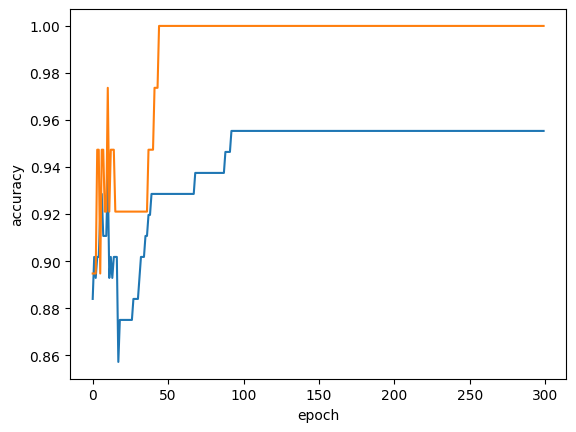

In [33]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 와인

In [ ]:
https://archive.ics.uci.edu/dataset/186/wine+quality